In [1]:
from geodata import Dataset, Cutout
from geodata.model.wind import WindExtrapolationModel
import matplotlib.pyplot as plt
import xarray as xr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Testing

In [2]:
dataset = Dataset(
    module="merra2",
    weather_data_config="slv_flux_hourly",
    years=slice(2010, 2010),
    months=slice(1,1)
)

model = WindExtrapolationModel(dataset)
model.prepare()

2023-09-18 23:12:54,068 - geodata.dataset - INFO - Using global bounds.
2023-09-18 23:12:54,068 - geodata.dataset - INFO - Directory /Users/apple/.local/geodata/merra2 found, checking for completeness.
2023-09-18 23:12:54,071 - geodata.dataset - INFO - Directory complete.
2023-09-18 23:13:02,437 - geodata - INFO - The model is already prepared.


In [3]:
speed1 = model.estimate(
    height=2,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [6]:
speed1loc = speed1.isel(lat=0, lon=0)
speed1loc = speed1loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [8]:
speed2 = model.estimate(
    height=10,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [9]:
speed2loc = speed2.isel(lat=0, lon=0)
speed2loc = speed2loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [10]:
speed3 = model.estimate(
    height=50,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [11]:
speed3loc = speed3.isel(lat=0, lon=0)
speed3loc = speed3loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [12]:
speed4 = model.estimate(
    height=80, # extrapolation in high heights
    years=slice(2010, 2010),
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [13]:
speed4loc = speed4.isel(lat=0, lon=0)
speed4loc = speed4loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


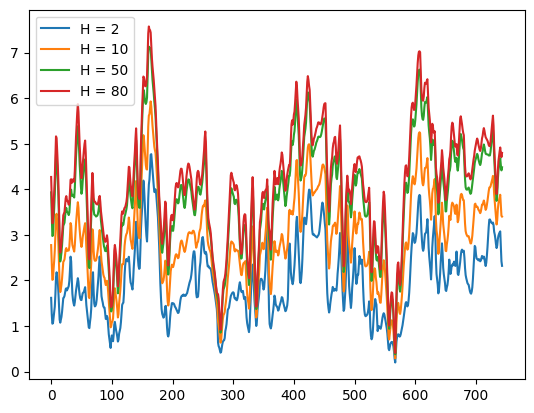

In [14]:
plt.plot(speed1loc, label='H = 2');
plt.plot(speed2loc, label='H = 10');
plt.plot(speed3loc, label='H = 50');
plt.plot(speed4loc, label='H = 80');
plt.legend()
plt.show()

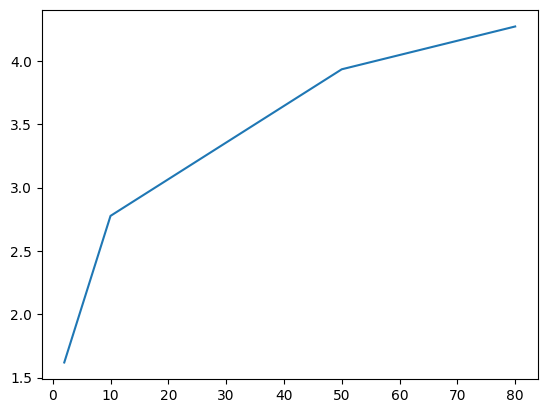

In [15]:
plt.plot([2, 10, 50, 80], 
         [speed1.isel(lon=0, lat=0, time=0).values,
          speed2.isel(lon=0, lat=0, time=0).values,
          speed3.isel(lon=0, lat=0, time=0).values,
          speed4.isel(lon=0, lat=0, time=0).values]
        );

### Cutout Testing

In [16]:
from geodata import Dataset, Cutout
from geodata.model.wind import WindExtrapolationModel
import matplotlib.pyplot as plt
import xarray as xr

In [17]:
cutout = Cutout(
    name="tokyo-2010-test",
    module="merra2",
    weather_data_config="slv_flux_hourly",
    xs=slice(138.5, 139.5),
    ys=slice(35, 36),
    years=slice(2010, 2010),
    months=slice(1, 1),
)

2023-09-13 11:03:06,893 - geodata.cutout - INFO - All cutout (tokyo-2010-test, /Users/apple/.local/geodata/cutouts) files available.
2023-09-13 11:03:06,898 - geodata.cutout - INFO - Cutout subset prepared: <Cutout tokyo-2010-test x=138.75-139.38 y=35.00-36.00 time=2010/1-2010/1 prepared>


In [18]:
cutout_model = WindExtrapolationModel(cutout)
cutout_model.prepare()

2023-09-13 11:03:06,906 - geodata - INFO - The model is already prepared.


In [19]:
cutout_speed1 = cutout_model.estimate(
    height=2, 
    years=slice(2010, 2010), 
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [20]:
cutout_speed_loc1 = cutout_speed1.isel(x=0, y=0, lat=0, lon=0)
cutout_speed_loc1 = cutout_speed_loc1.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [21]:
cutout_speed2 = cutout_model.estimate(
    height=10, 
    years=slice(2010, 2010), 
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [22]:
cutout_speed_loc2 = cutout_speed2.isel(x=0, y=0, lat=0, lon=0)
cutout_speed_loc2 = cutout_speed_loc2.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [23]:
cutout_speed3 = cutout_model.estimate(
    height=50, 
    years=slice(2010, 2010), 
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [24]:
cutout_speed_loc3 = cutout_speed3.isel(x=0, y=0, lat=0, lon=0)
cutout_speed_loc3 = cutout_speed_loc3.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [25]:
cutout_speed4 = cutout_model.estimate(
    height=80, 
    years=slice(2010, 2010), 
    months=slice(1, 1)
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))


In [26]:
cutout_speed_loc4 = cutout_speed4.isel(x=0, y=0, lat=0, lon=0)
cutout_speed_loc4 = cutout_speed_loc4.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


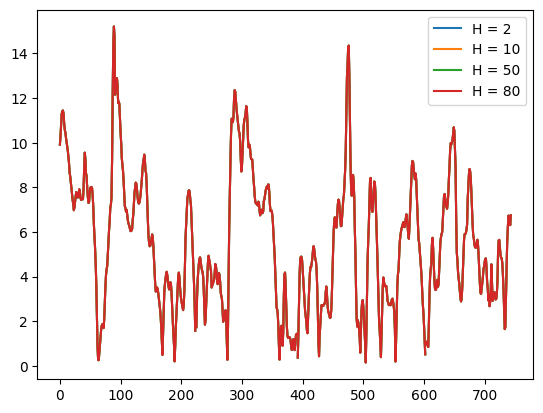

In [27]:
plt.plot(cutout_speed_loc1, label='H = 2');
plt.plot(cutout_speed_loc2, label='H = 10');
plt.plot(cutout_speed_loc3, label='H = 50');
plt.plot(cutout_speed_loc4, label='H = 80');
plt.legend()
plt.show()